In [32]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.0.1+cpu


## Introduction Tensors
### Creating Tensors

In [33]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [34]:
scalar.ndim

0

In [35]:
scalar.item()

7

In [36]:
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [37]:
vector.ndim

1

In [38]:
vector.shape

torch.Size([2])

In [39]:
# matrix
matrix = torch.tensor([[7, 7], 
                       [6, 6],
                       [12, 12]])
matrix

tensor([[ 7,  7],
        [ 6,  6],
        [12, 12]])

In [40]:
matrix.ndim

2

In [41]:
matrix[0:2]

tensor([[7, 7],
        [6, 6]])

In [42]:
matrix.shape

torch.Size([3, 2])

In [43]:
# Tensor
tensor = torch.tensor([[[1, 2, 3],
                        [1,2,3]
                        ],
                       [[4, 5, 6],
                        [7,8,8]
                        ]
                       ])

In [44]:
tensor

tensor([[[1, 2, 3],
         [1, 2, 3]],

        [[4, 5, 6],
         [7, 8, 8]]])

In [45]:
tensor.ndim

3

In [46]:
tensor.shape

torch.Size([2, 2, 3])

## Random tensors

In [47]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand((4, 3, 4))
random_tensor

tensor([[[0.7955, 0.5781, 0.6106, 0.8657],
         [0.1846, 0.8559, 0.3011, 0.4298],
         [0.3113, 0.8054, 0.3197, 0.5436]],

        [[0.2870, 0.1701, 0.5133, 0.4922],
         [0.2098, 0.9061, 0.1981, 0.8570],
         [0.2332, 0.9671, 0.2946, 0.5936]],

        [[0.0575, 0.6582, 0.0025, 0.6142],
         [0.3528, 0.3757, 0.3840, 0.7216],
         [0.6270, 0.8679, 0.4059, 0.8430]],

        [[0.2605, 0.9842, 0.3785, 0.9071],
         [0.8175, 0.7125, 0.3653, 0.4424],
         [0.7794, 0.9184, 0.7495, 0.3315]]])

In [48]:
random_tensor.ndim

3

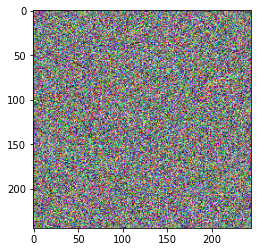

In [49]:
# Create a random tensor with similar shape to an image tensor
rand_img_size_tensor = torch.rand(size=(244, 244, 3), )
plt.imshow(rand_img_size_tensor)

### Zeros an one

In [50]:
torch.zeros((3, 3))


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [51]:
torch.ones((3,4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### Create a range of tensor and tensors-like

In [52]:
# Use torch.range()
torch.range(1, 12)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15440\3896863621.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.range(1, 12)


tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [53]:
# Use torch.arange()
torch.arange(1, 12)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## Tensor datatypes

In [54]:
#  Float 32 tensor
float_32_tensor = torch.tensor([1,2,3], dtype=torch.float32)
float_32_tensor

tensor([1., 2., 3.])

In [55]:
%%time
for i in tensor:
    print(i)

tensor([[1, 2, 3],
        [1, 2, 3]])
tensor([[4, 5, 6],
        [7, 8, 8]])
CPU times: total: 0 ns
Wall time: 1.37 ms


In [56]:
tensor = torch.tensor([[12, 2, 3]])

In [57]:
%%time
tensor@tensor.T

CPU times: total: 0 ns
Wall time: 0 ns


tensor([[157]])

In [58]:
%%time
torch.matmul(tensor,tensor.T)

CPU times: total: 0 ns
Wall time: 0 ns


tensor([[157]])

**Note :** Using build-in function in pytorch is faster than using @ operator

## Matrix multiplication

In [59]:
tensor_A = torch.tensor([[1,2], 
                         [3,4],
                         [5,6]
                         ])
tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]
                         ])
torch.matmul(tensor_A,tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

#### Can not use matrix multiplication on tensor_A and tensor_B because
#### the shape of tenser_A and tensor_B are the same (3x2)
#### We cant use matrix multiplication on tensor_A and tensor_B if columns of tenser_A equals with rows of tenser_B
**Example** : **(3x2)@(2x3)**

In [60]:
torch.matmul(tensor_A,tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

## Finding min, max, mean, sum, ...

In [61]:
x = torch.arange(0, 100, 5)
x

tensor([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
        90, 95])

In [62]:
x.max(), x.min()

(tensor(95), tensor(0))

In [63]:
torch.std(x.type(torch.float32))

tensor(29.5804)

In [64]:
torch.median(x.type(torch.float32))

tensor(45.)

In [65]:
torch.var(x.type(torch.float32))

tensor(875.)

In [66]:
torch.sum(x)

tensor(950)

In [67]:
torch.argmax(x)

tensor(19)

In [68]:
torch.argmin(x)

tensor(0)

## Reshaping, Stacking, Squeezing and Un_squeezing

In [69]:
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [70]:
# Add an extra dimension
x_reshaped = x.reshape(1, 3)

RuntimeError: shape '[1, 3]' is invalid for input of size 9

In [81]:
x_reshaped = x.reshape(1, 9)
x_reshaped

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [82]:
# Stack tensors on top
torch.stack([x, x, x,x], dim=1)

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

In [83]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [84]:
# Change view (keeps same data as original but changes view)
z = x.view(1, 9)
z, z.shape

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [85]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [86]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [90]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=1)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor: tensor([[5.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])
New shape: torch.Size([9, 1])


In [94]:
# Permute is rearranged the dimensions of a target tensor in a specific order
x = torch.rand(2, 5, 4)
x_permuted = torch.permute(x, [2, 0, 1])
print(f'Previous shape : {x.shape}')
print(f'New shape : {x_permuted.shape}')

Previous shape : torch.Size([2, 5, 4])
New shape : torch.Size([4, 2, 5])


In [96]:
tensor = torch.tensor([[[1, 2, 3],
                        [1,2,3]
                        ],
                       [[4, 5, 6],
                        [7,8,8]
                        ]
                       ])
tensor.shape

torch.Size([2, 2, 3])

In [98]:
torch.permute(tensor, [2, 1, 0])

tensor([[[1, 4],
         [1, 7]],

        [[2, 5],
         [2, 8]],

        [[3, 6],
         [3, 8]]])

In [100]:
tensor = torch.randint(1, 20, size=[3, 2, 5])
tensor

tensor([[[16,  8, 13,  2, 14],
         [ 6, 10, 19,  3, 16]],

        [[12, 13,  5,  2, 19],
         [10, 16,  1, 16,  6]],

        [[ 5, 14, 14,  8,  2],
         [10, 11,  3, 19,  4]]])

In [103]:
torch.permute(tensor, [1, 0, 2])

tensor([[[16,  8, 13,  2, 14],
         [12, 13,  5,  2, 19],
         [ 5, 14, 14,  8,  2]],

        [[ 6, 10, 19,  3, 16],
         [10, 16,  1, 16,  6],
         [10, 11,  3, 19,  4]]])

TypeError: rand() received an invalid combination of arguments - got (int, int, random_seed=int), but expected one of:
 * (tuple of ints size, *, torch.Generator generator, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
